<a href="https://colab.research.google.com/github/vgallegod/Senales-y-sistemas/blob/main/intro_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
ymin=0  #valor minimo de tension
ymax=10  #valor maximo de tension
def pendiente(x,ymin,ymax):
  xmax=max(x)
  xmin=min(x)
  m=(ymax-ymin)/(xmax-xmin) #pendiente
  c=ymin-m*xmin #intercepto
  y=m*x+c #señal generada
  return y

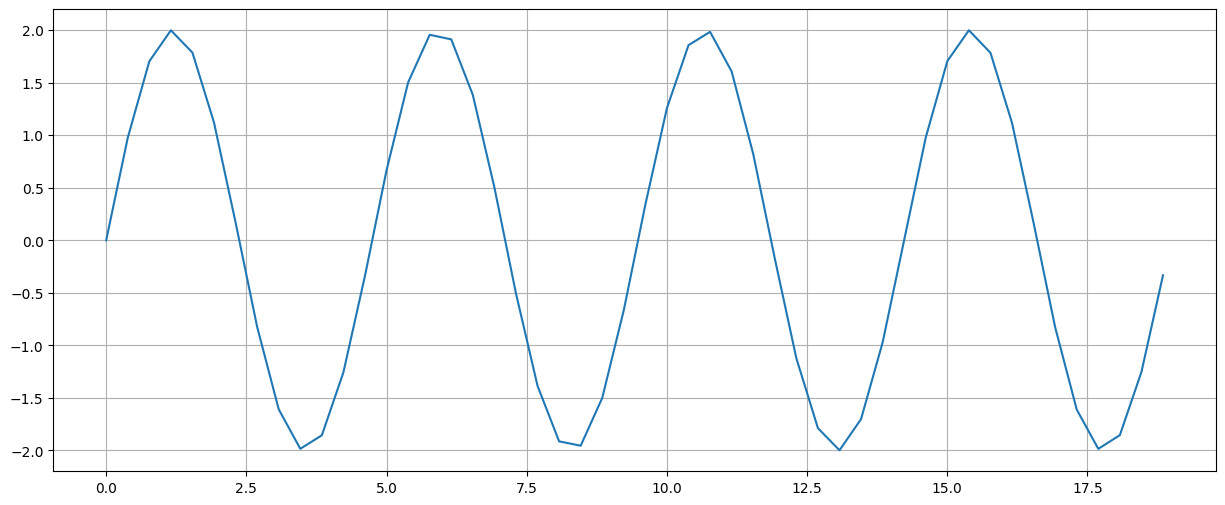

In [ ]:
Fo = 60
To = 1/60
ti=0
tf=6*np.pi
vt = np.linspace(ti,tf,num=50)
x = 2*np.sin(2*np.pi*vt*Fo)
plt.figure(figsize=(15,6))
plt.plot(vt,x)
plt.grid()

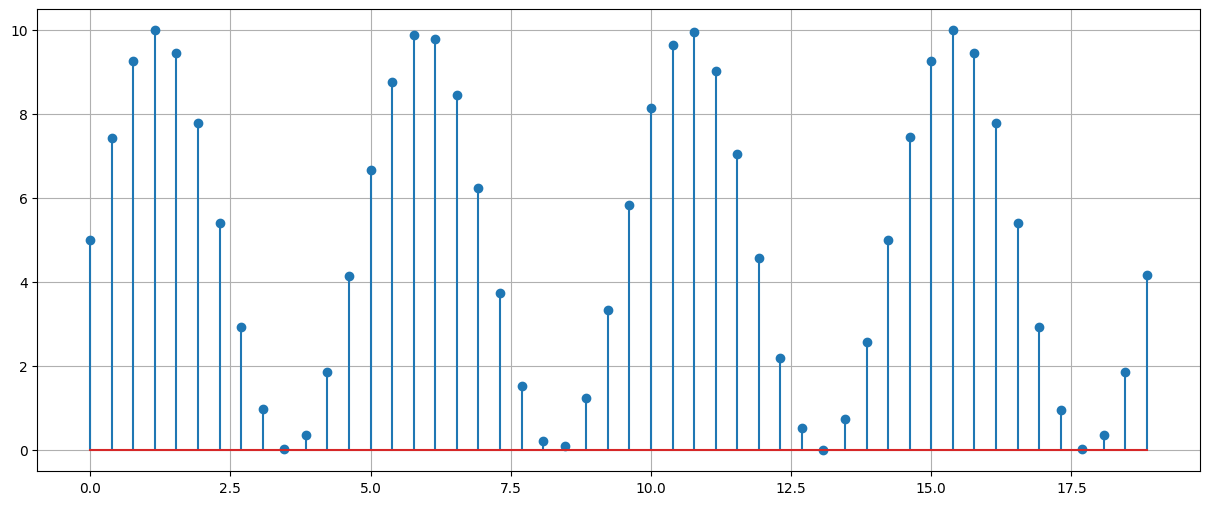

In [ ]:
x2 = pendiente(x,ymin,ymax)
plt.figure(figsize=(15,6))
plt.stem(vt,x2)
plt.grid()

In [ ]:
nbits=3
rmin=0
rmax=10
ve=np.linspace(rmin,rmax,2**nbits)
d=cdist(x2.reshape(-1,1),ve.reshape(-1,1))
ind=np.argmin(d,axis=1)

In [ ]:
def cuantizador(x3,ve2):
  Ne=ve2.shape[0]
  dn=cdist(x3.reshape(-1,1),ve2.reshape(-1,1))
  ind=np.argmin(dn)
  return ve2[ind]

In [ ]:
for i in range(x2.shape[0]):
  if i==0:
    x3=cuantizador(x2[i],ve)
  else:
    x3=np.append(x3,cuantizador(x2[i],ve))

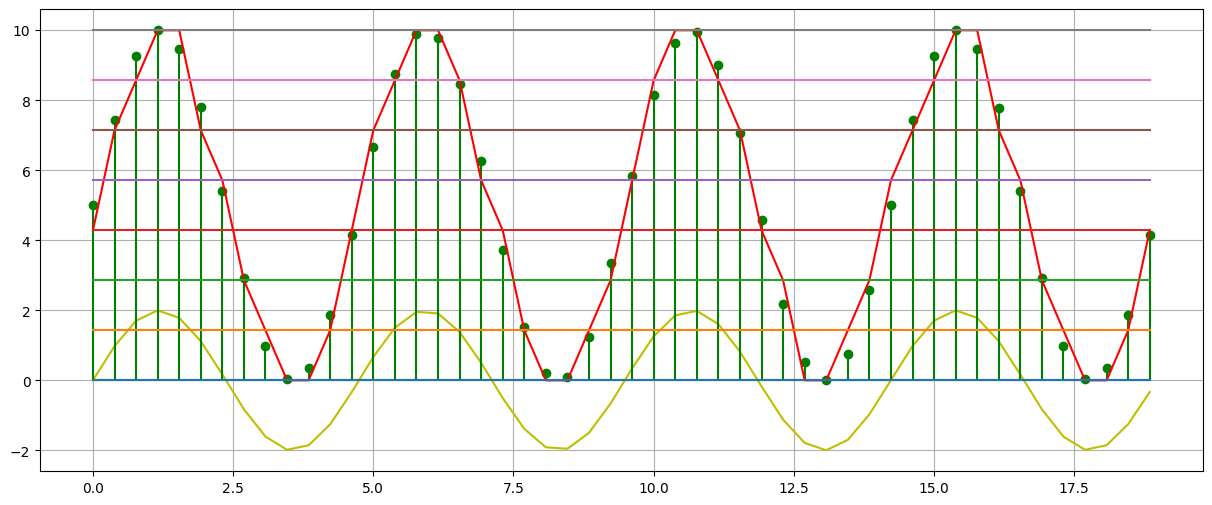

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(vt,x,c='y')
plt.stem(vt,x2,linefmt='g')
plt.plot(vt,x3,c='r')

for v in ve:
  plt.plot(vt,v*np.ones(len(vt)))

plt.grid()